In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [7]:
ds_seq0=xr.open_dataset('seq0.nc')
ds_seq2=xr.open_dataset('seq2.nc')
ds_seq3=xr.open_dataset('seq3.nc')
ds_scurl0=xr.open_dataset('scurl0.nc')
ds_eq0=xr.open_dataset('eq0.nc')
ds_eq2=xr.open_dataset('eq2.nc')
ds_eq3=xr.open_dataset('eq3.nc')
ds_curl0=xr.open_dataset('curl0.nc')

geo = xr.open_dataset('/media/mesomiso/T7 Shield/Code/with_precip/ocean_geometry.nc', decode_times=False)
geo = geo.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset

In [41]:
ds_seq0

<xarray.Dataset> Size: 51MB
Dimensions:           (xq: 81, yh: 140, zl: 32, Time: 5, nv: 2, xh: 80,
                       yq: 141, zi: 33)
Coordinates:
  * xq                (xq) float64 648B 0.0 1.0 2.0 3.0 ... 77.0 78.0 79.0 80.0
  * yh                (yh) float64 1kB -69.5 -68.5 -67.5 ... 67.5 68.5 69.5
  * zl                (zl) float64 256B 6.5 20.5 36.5 ... 3.55e+03 3.846e+03
  * Time              (Time) float64 40B 1.939e+06 1.946e+06 ... 1.968e+06
  * nv                (nv) float64 16B 1.0 2.0
  * xh                (xh) float64 640B 0.5 1.5 2.5 3.5 ... 76.5 77.5 78.5 79.5
  * yq                (yq) float64 1kB -70.0 -69.0 -68.0 ... 68.0 69.0 70.0
  * zi                (zi) float64 264B 0.0 13.0 28.0 ... 3.691e+03 4e+03
Data variables:
    u                 (Time, zl, yh, xq) float32 7MB ...
    v                 (Time, zl, yq, xh) float32 7MB ...
    h                 (Time, zl, yh, xh) float64 14MB ...
    e                 (Time, zi, yh, xh) float32 7MB ...
    temp              (Time, zl, yh, xh) float32 7MB ...
    age               (Time, zl, yh, xh) float32 7MB ...
    net_heat_surface  (Time, yh, xh) float32 224kB ...
    average_T1        (Time) float64 40B ...
    average_T2        (Time) float64 40B ...
    average_DT        (Time) float64 40B ...
    Time_bnds         (Time, nv) float64 80B ...
Attributes:
    filename:   linear_d2_prog__5308_170.nc
    title:      MOM Experiment
    grid_type:  regular
    grid_tile:  N/A

In [4]:
a1=[6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]
a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

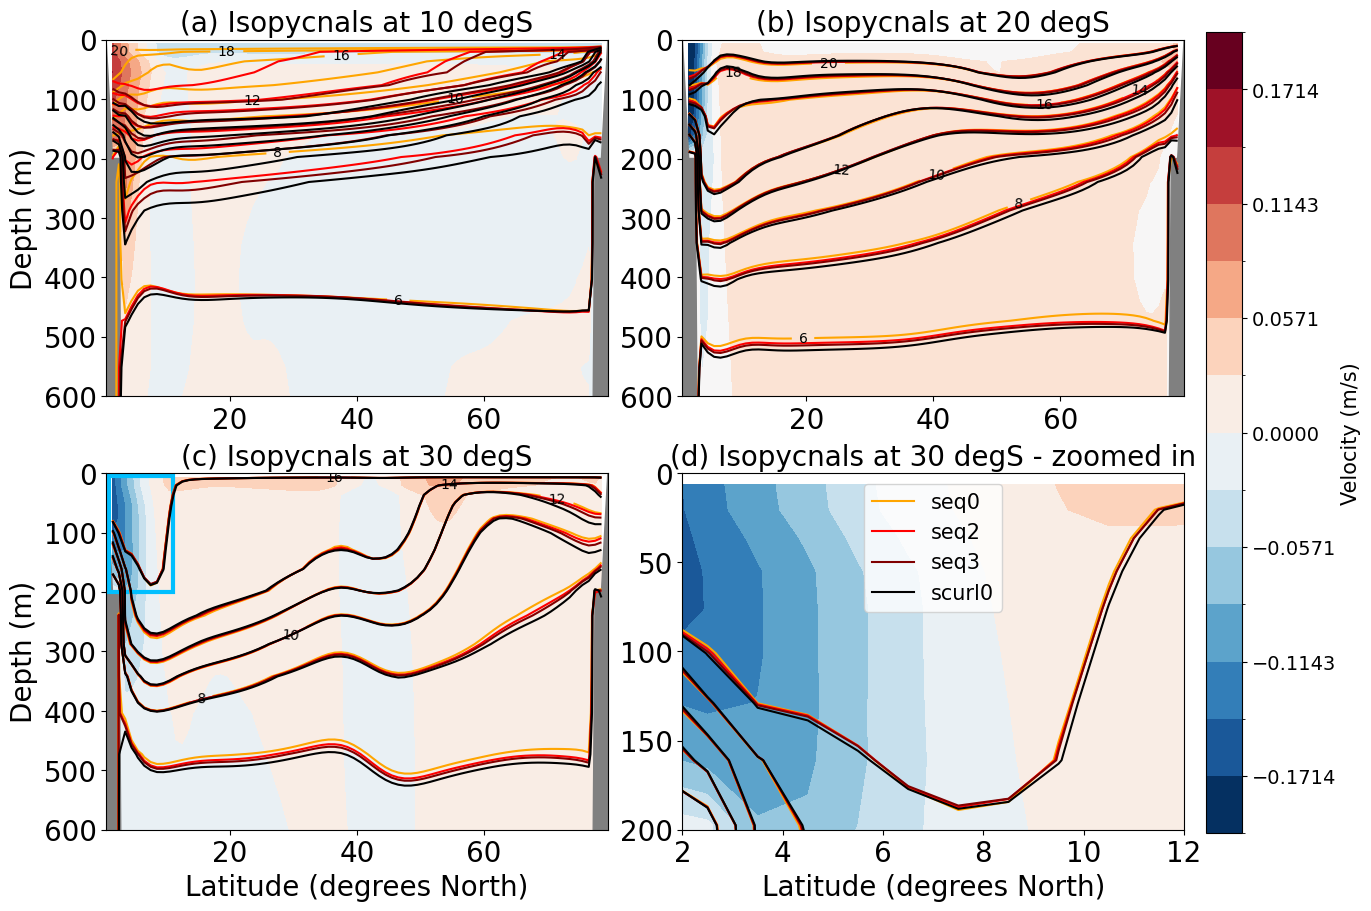

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(12,9))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
b=[6.0,7.5,9.0,10.5,12.0,13.5,15,17,19,20]

ax0 = fig.add_subplot(gs[0, 0])
vseq0 = ds_seq0.v.isel(yq=60).plot.contourf(ax=ax0, levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=60).plot.contour(ax=ax0, levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=60).plot.contour(ax=ax0, levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=60).plot.contour(ax=ax0, levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=60).plot.contour(ax=ax0, levels=a1, colors="black")
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,0])

ax0.fill_between(geo.D.isel(yh=70).xh, 5000, geo.D.isel(yh=70), color='grey') 
ax0.clabel(seq0, fontsize=10, colors='black')
ax0.set_ylim(0,600)
ax0.invert_yaxis()
ax0.set_title('(a) Isopycnals at 10 degS', fontsize=20)
ax0.tick_params(axis='both',labelsize=20)
ax0.set_xlabel('')
ax0.set_ylabel("Depth (m)", fontsize=20)

ax1 = fig.add_subplot(gs[0,1])
vseq0 = ds_seq0.v.isel(yq=50).plot.contourf(ax=ax1, levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=50).plot.contour(ax=ax1, levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=50).plot.contour(ax=ax1, levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=50).plot.contour(ax=ax1, levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=50).plot.contour(ax=ax1, levels=a1, colors="black")
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,0])


ax1.fill_between(geo.D.isel(yh=90).xh, 5000, geo.D.isel(yh=90), color='grey') 
ax1.clabel(seq0, fontsize=10, colors='black')
ax1.set_ylim(0,600)
ax1.invert_yaxis()
ax1.set_title('(b) Isopycnals at 20 degS', fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.set_xlabel('')
ax1.set_ylabel("", fontsize=20)

ax2 = fig.add_subplot(gs[1,0])
vseq01 = ds_seq0.v.isel(yq=40).plot.contourf(ax=ax2,levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=40).plot.contour(ax=ax2,levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=40).plot.contour(ax=ax2,levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=40).plot.contour(ax=ax2,levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=40).plot.contour(ax=ax2,levels=a1, colors="black")

ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='grey') 
ax2.clabel(seq0, fontsize=10, colors='black')
ax2.set_ylim(0,600)
ax2.invert_yaxis()
rect = patches.Rectangle((1, 200), 10, -195, linewidth=3, edgecolor='deepskyblue', facecolor='None')
ax2.add_patch(rect)
ax2.set_title('(c) Isopycnals at 30 degS', fontsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax2.set_xlabel('Latitude (degrees North)', fontsize=20)
ax2.set_ylabel("Depth (m)", fontsize=20)

ax3 = fig.add_subplot(gs[1,1])
vseq0 = ds_seq0.v.isel(yq=40).plot.contourf(ax=ax3,levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=40).plot.contour(ax=ax3,levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=40).plot.contour(ax=ax3,levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=40).plot.contour(ax=ax3,levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=40).plot.contour(ax=ax3,levels=a1, colors="black")
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,1])

legend_eq0 = matplotlib.lines.Line2D([], [], marker='None', color='orange', label='seq0', markersize=10)
legend_eq2 = matplotlib.lines.Line2D([], [], marker='None', color='red', label='seq2', markersize=10)
legend_eq3 = matplotlib.lines.Line2D([], [], marker='None', color='maroon', label='seq3', markersize=10)
legend_no_curl = matplotlib.lines.Line2D([], [], marker='None', color='black', label='scurl0', markersize=10)

# ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='black') 
ax3.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax3.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax3.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax3.set_ylim(0,200)
ax3.set_xlim(2,12)
ax3.invert_yaxis()
ax3.set_title('(d) Isopycnals at 30 degS - zoomed in', fontsize=20)
ax3.tick_params(axis='both',labelsize=20)
ax3.set_xlabel('Latitude (degrees North)', fontsize=20)
ax3.set_ylabel("", fontsize=20)

ax3.legend(handles=[legend_eq0, legend_eq2, legend_eq3, legend_no_curl], fontsize=15, loc='upper center')

# fig.subplots_adjust(right=0.7)
cbar_ax = fig.add_axes([1, 0.08, 0.03, 0.89])
cbar=fig.colorbar(vseq01, cax=cbar_ax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Velocity (m/s)', fontsize=15)

# plt.savefig('iso.png', bbox_inches='tight')

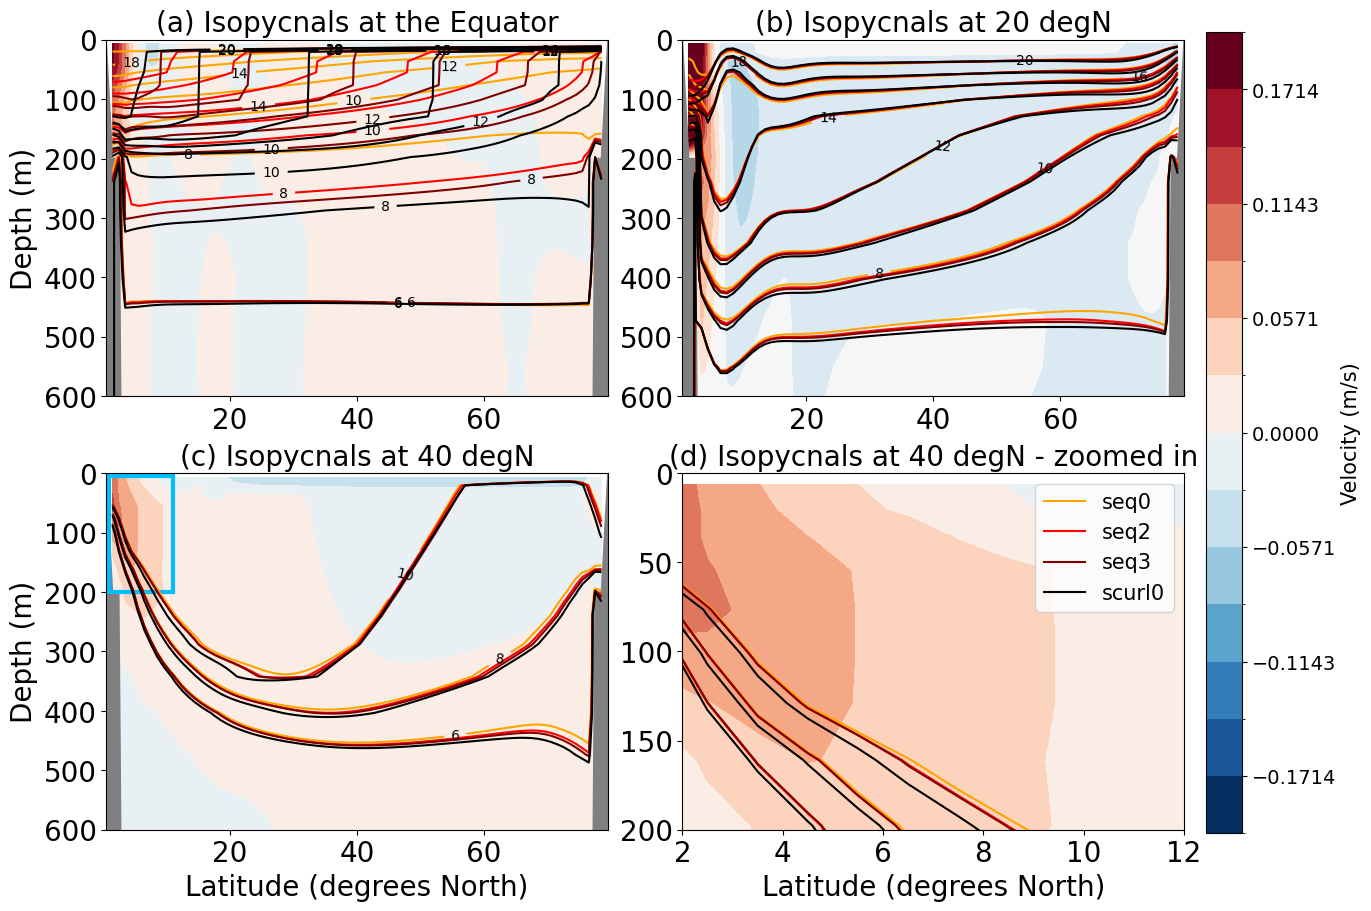

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(12,9))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
b=[6.0,7.5,9.0,10.5,12.0,13.5,15,17,19,20]

ax0 = fig.add_subplot(gs[0, 0])
vseq01 = ds_seq0.v.isel(yq=70).plot.contourf(ax=ax0, levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=70).plot.contour(ax=ax0, levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=70).plot.contour(ax=ax0, levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=70).plot.contour(ax=ax0, levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=70).plot.contour(ax=ax0, levels=a1, colors="black")
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,0])

ax0.fill_between(geo.D.isel(yh=70).xh, 5000, geo.D.isel(yh=70), color='grey') 
ax0.clabel(seq0, fontsize=10, colors='black')
ax0.clabel(seqw, fontsize=10, colors='black')
ax0.clabel(seq3, fontsize=10, colors='black')
ax0.clabel(scurl0, fontsize=10, colors='black')
ax0.set_ylim(0,600)
ax0.invert_yaxis()
ax0.set_title('(a) Isopycnals at the Equator', fontsize=20)
ax0.tick_params(axis='both',labelsize=20)
ax0.set_xlabel('')
ax0.set_ylabel("Depth (m)", fontsize=20)

ax1 = fig.add_subplot(gs[0,1])
vseq0 = ds_seq0.v.isel(yq=90).plot.contourf(ax=ax1, levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=90).plot.contour(ax=ax1, levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=90).plot.contour(ax=ax1, levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=90).plot.contour(ax=ax1, levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=90).plot.contour(ax=ax1, levels=a1, colors="black")
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,0])


ax1.fill_between(geo.D.isel(yh=90).xh, 5000, geo.D.isel(yh=90), color='grey') 
ax1.clabel(seq0, fontsize=10, colors='black')
ax1.set_ylim(0,600)
ax1.invert_yaxis()
ax1.set_title('(b) Isopycnals at 20 degN', fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.set_xlabel('')
ax1.set_ylabel("", fontsize=20)

ax2 = fig.add_subplot(gs[1,0])
vseq0 = ds_seq0.v.isel(yq=110).plot.contourf(ax=ax2,levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=110).plot.contour(ax=ax2,levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=110).plot.contour(ax=ax2,levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=110).plot.contour(ax=ax2,levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=110).plot.contour(ax=ax2,levels=a1, colors="black")

ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='grey') 
ax2.clabel(seq0, fontsize=10, colors='black')
ax2.set_ylim(0,600)
ax2.invert_yaxis()
rect = patches.Rectangle((1, 200), 10, -195, linewidth=3, edgecolor='deepskyblue', facecolor='None')
ax2.add_patch(rect)
ax2.set_title('(c) Isopycnals at 40 degN', fontsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax2.set_xlabel('Latitude (degrees North)', fontsize=20)
ax2.set_ylabel("Depth (m)", fontsize=20)

ax3 = fig.add_subplot(gs[1,1])
vseq0 = ds_seq0.v.isel(yq=110).plot.contourf(ax=ax3,levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=110).plot.contour(ax=ax3,levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=110).plot.contour(ax=ax3,levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=110).plot.contour(ax=ax3,levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=110).plot.contour(ax=ax3,levels=a1, colors="black")
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,1])

legend_eq0 = matplotlib.lines.Line2D([], [], marker='None', color='orange', label='seq0', markersize=10)
legend_eq2 = matplotlib.lines.Line2D([], [], marker='None', color='red', label='seq2', markersize=10)
legend_eq3 = matplotlib.lines.Line2D([], [], marker='None', color='maroon', label='seq3', markersize=10)
legend_no_curl = matplotlib.lines.Line2D([], [], marker='None', color='black', label='scurl0', markersize=10)

# ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='black') 
ax3.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax3.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax3.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax3.set_ylim(0,200)
ax3.set_xlim(2,12)
ax3.invert_yaxis()
ax3.set_title('(d) Isopycnals at 40 degN - zoomed in', fontsize=20)
ax3.tick_params(axis='both',labelsize=20)
ax3.set_xlabel('Latitude (degrees North)', fontsize=20)
ax3.set_ylabel("", fontsize=20)

ax3.legend(handles=[legend_eq0, legend_eq2, legend_eq3, legend_no_curl], fontsize=15)

cbar_ax = fig.add_axes([1, 0.08, 0.03, 0.89])
cbar=fig.colorbar(vseq01, cax=cbar_ax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Velocity (m/s)', fontsize=15)

plt.savefig('iso.png', bbox_inches='tight')

# Plotted Individually 

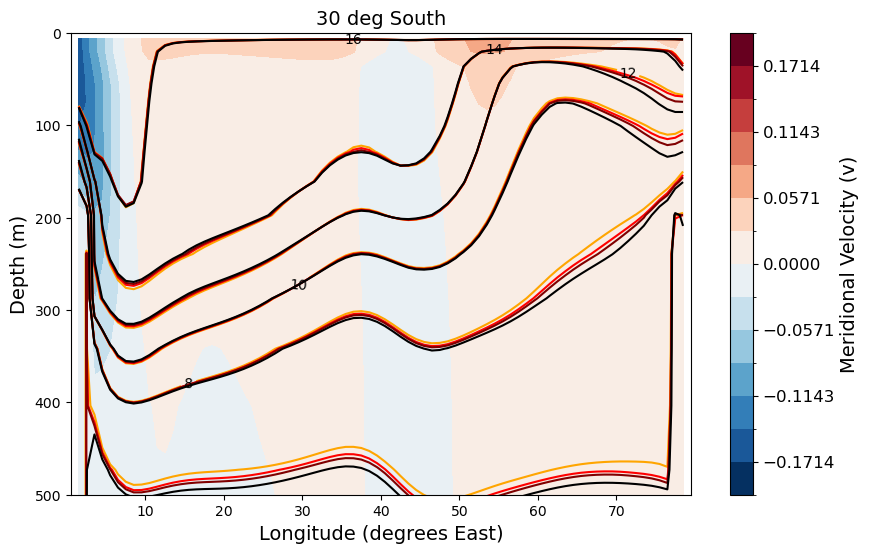

In [10]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=40).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=40).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=40).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=40).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=40).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
# plt.clabel(seqw, fontsize=10, colors='black')
# plt.clabel(seq3, fontsize=10, colors='black')
# plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('30 deg South', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Meridional Velocity (v)', fontsize=14) 

plt.show()

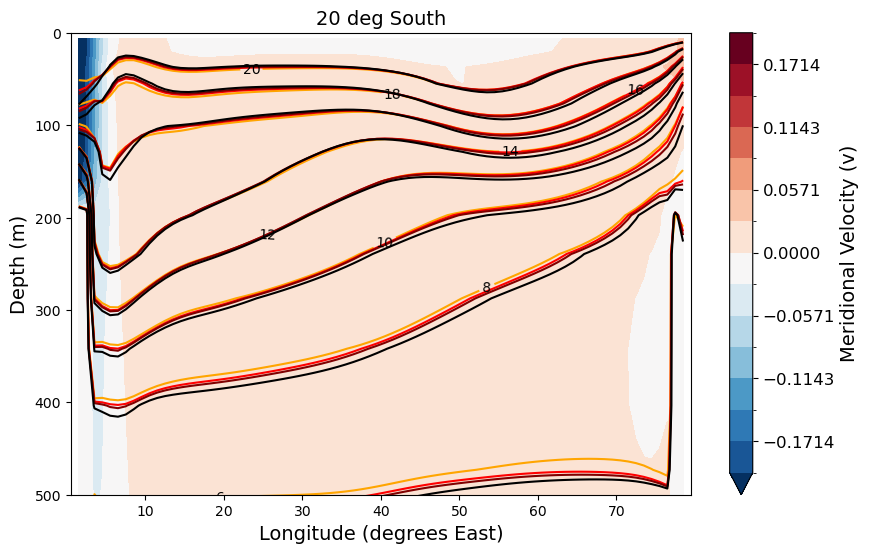

In [11]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=50).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=50).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=50).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=50).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=50).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
# plt.clabel(seqw, fontsize=10, colors='black')
# plt.clabel(seq3, fontsize=10, colors='black')
# plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('20 deg South', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Meridional Velocity (v)', fontsize=14) 

plt.show()

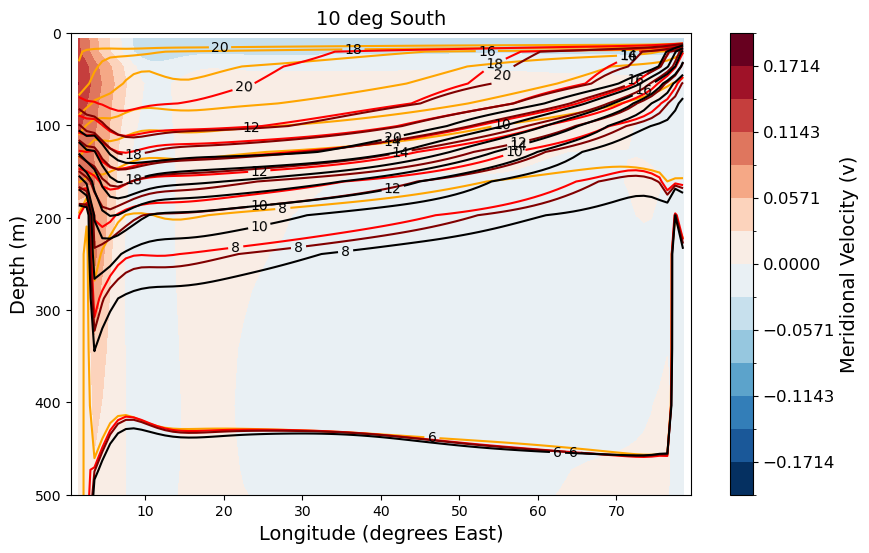

In [12]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=60).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=60).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=60).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=60).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=60).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
plt.clabel(seqw, fontsize=10, colors='black')
plt.clabel(seq3, fontsize=10, colors='black')
plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('10 deg South', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Meridional Velocity (v)', fontsize=14)

plt.show()

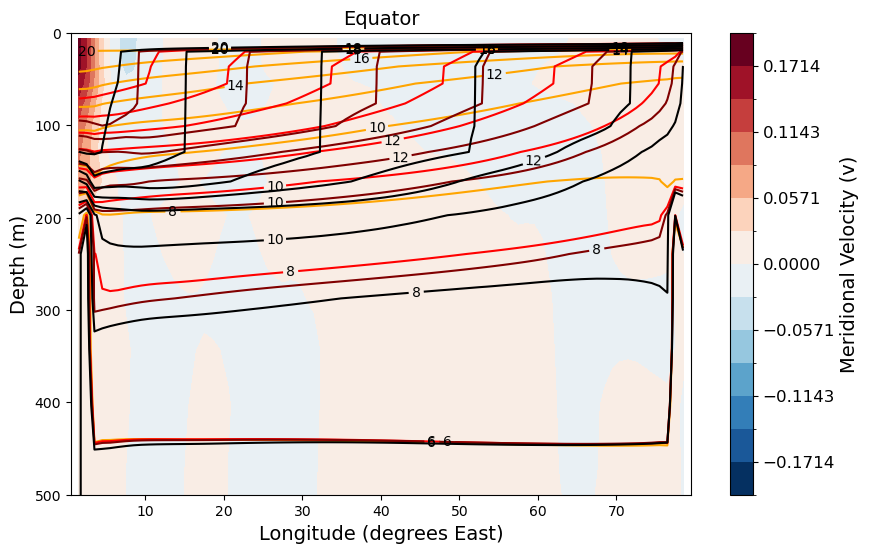

In [13]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=70).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=70).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=70).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=70).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=70).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
plt.clabel(seqw, fontsize=10, colors='black')
plt.clabel(seq3, fontsize=10, colors='black')
plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('Equator', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Meridional Velocity (v)', fontsize=14)

plt.show()

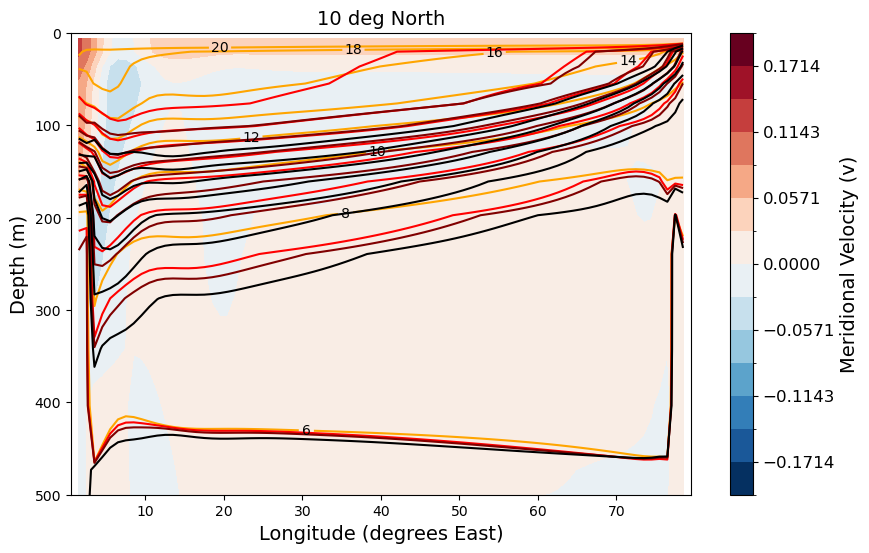

In [14]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=80).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=80).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=80).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=80).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=80).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
# plt.clabel(seqw, fontsize=10, colors='black')
# plt.clabel(seq3, fontsize=10, colors='black')
# plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('10 deg North', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('Meridional Velocity (v)', fontsize=14)

plt.show()

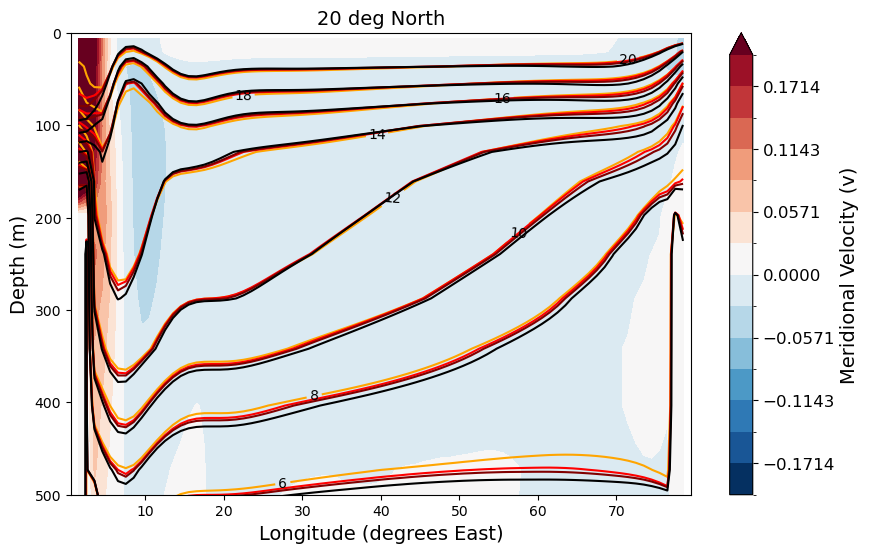

In [15]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=90).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=90).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=90).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=90).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=90).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
# plt.clabel(seqw, fontsize=10, colors='black')
# plt.clabel(seq3, fontsize=10, colors='black')
# plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('20 deg North', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('Meridional Velocity (v)', fontsize=14)

plt.show()

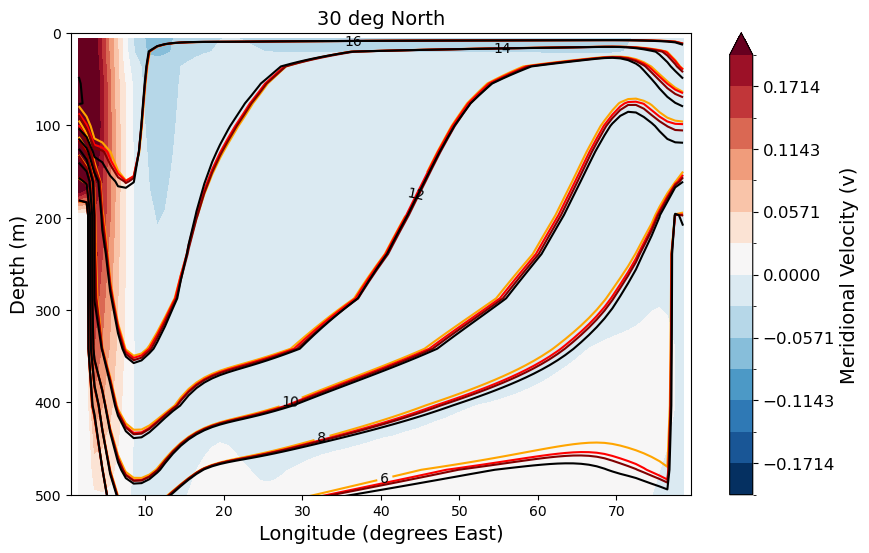

In [16]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=100).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=100).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=100).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=100).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=100).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
# plt.clabel(seqw, fontsize=10, colors='black')
# plt.clabel(seq3, fontsize=10, colors='black')
# plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('30 deg North', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Meridional Velocity (v)', fontsize=14)

plt.show()

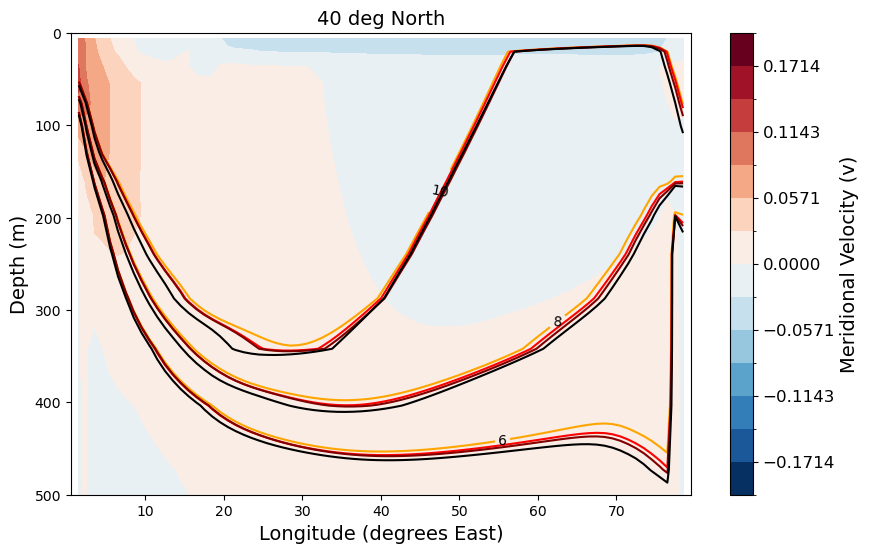

In [17]:
# fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))
plt.figure(figsize=(10,6))
vseq0 = ds_seq0.v.isel(yq=110).plot.contourf(levels=15, cmap="RdBu_r", vmin=-0.2, add_colorbar=False)
seq0 = ds_seq0.temp.isel(yh=110).plot.contour(levels=a1, colors="orange")
seqw = ds_seq2.temp.isel(yh=110).plot.contour(levels=a1, colors="r")
seq3 = ds_seq3.temp.isel(yh=110).plot.contour(levels=a1, colors="maroon")
scurl0 = ds_scurl0.temp.isel(yh=110).plot.contour(levels=a1, colors="black")

plt.clabel(seq0, fontsize=10, colors='black')
# plt.clabel(seqw, fontsize=10, colors='black')
# plt.clabel(seq3, fontsize=10, colors='black')
# plt.clabel(scurl0, fontsize=10, colors='black')

plt.gca().set_ylim(0, 500)
plt.gca().invert_yaxis()

plt.gca().set_title('40 deg North', fontsize=14)
plt.gca().set_xlabel("Longitude (degrees East)", fontsize=14)
plt.gca().set_ylabel("Depth (m)", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=10)

cbar = plt.colorbar(vseq0, location='right')
cbar.ax.tick_params(labelsize=12)  
cbar.set_label('Meridional Velocity (v)', fontsize=14) 

plt.show()